# Неделя 2, занятие 1. Поиск в глубину

В этом ноутбуке мы потренируемся работать с поиском в глубину

In [1]:
# Задаем граф

import networkx as nx

graph = nx.Graph()

graph.add_nodes_from(['A','B','C','D','E','F'])
graph.add_edges_from([('A','B'), ('B','C'), ('C','A'),('B','D'),('B','E'),('D','E')])

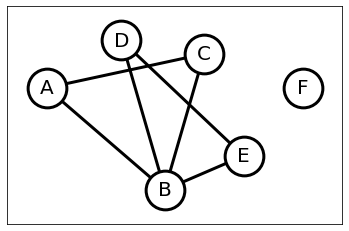

In [2]:
# Рисуем граф примерно как в слайдах

import matplotlib.pyplot as plt

pos = {'A': (1, 1.5), 'B': (4, 0), 'C': (5, 2), 'D': (2.9, 2.2), 'E': (6, 0.5), 'F': (7.5, 1.5)}

def draw_G():
    options = {
        "font_size": 20,
        "node_size": 1500,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 3,
        "width": 3,
    }

    plt.axis([0, 8.5, -0.5, 2.7])
    nx.draw_networkx(graph, pos, **options)
    plt.show()
    
draw_G()

Pre:	 [('A', 0), ('B', 1), ('C', 2), ('D', 4), ('E', 5), ('F', 10)]
Post:	 [('A', 9), ('B', 8), ('C', 3), ('D', 7), ('E', 6), ('F', 11)]


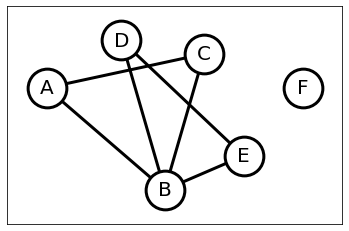

In [3]:
# Реализуем поиск в глубину

clock = 0

pre={}
post={}

def Previsit(v):
    global clock
    pre[v]=clock
    clock+=1

def Postvisit(v):
    global clock
    post[v]=clock
    clock+=1

visited={}
for v in graph:
    visited[v]=False

def Explore(v):
    visited[v]=True
    Previsit(v)
    for u in graph[v]:
        if not visited[u]:
            Explore(u)
    Postvisit(v)
            
def dfs():
    for v in graph:
        if not visited[v]:
            Explore(v)   
            
dfs()

print("Pre:\t",sorted(pre.items()))
print("Post:\t",sorted(post.items()))
draw_G()

Pre:	 [('A', 0), ('B', 1), ('C', 2), ('D', 4), ('E', 5), ('F', 10)]
Post:	 [('A', 9), ('B', 8), ('C', 3), ('D', 7), ('E', 6), ('F', 11)]


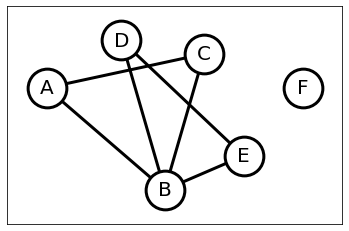

In [4]:
# Реализуем поиск в глубину без глобальных переменных

pre={}
post={}

def Previsit(v, pre, clock):
    pre[v]=clock
    clock+=1
    return clock

def Postvisit(v, post, clock):
    post[v]=clock
    clock+=1
    return clock

visited=dict()
for v in graph:
    visited[v]=False

def Explore(v,graph,pre,post,clock,visited):
    visited[v]=True
    clock = Previsit(v,pre,clock)
    for u in graph[v]:
        if not visited[u]:
            clock = Explore(u,graph,pre,post,clock,visited)
    clock = Postvisit(v,post,clock)
    return clock
            
def dfs(graph,pre,post,visited):
    clock=0
    for v in graph:
        if not visited[v]:
            clock = Explore(v,graph,pre,post,clock,visited)

dfs(graph,pre,post,visited)

print("Pre:\t",sorted(pre.items()))
print("Post:\t",sorted(post.items()))

draw_G()

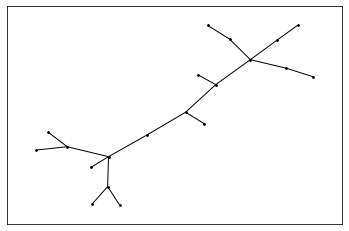

In [5]:
# Задаем дерево

import matplotlib.pyplot as plt

# В этой строчке задается случайное дерево на 20 вершинах. При каждом перезапуске блока будет создаваться новое дерево.
tree = nx.random_tree(20)

# В варианте в строчке ниже генерируется регулярное дерево ветвления 4 и глубины 4
# tree = nx.generators.classic.balanced_tree(4, 4)

#nx.draw_networkx(tree)

# Рисуем граф
def draw_G(G):
    options = {
        "node_size": 3,
        "node_color": "black",
        "edgecolors": "black",
        "linewidths": 1,
        "width": 1,
    }

    nx.draw_networkx(G, with_labels=False, **options)
    plt.show()
    
draw_G(tree)

In [19]:
# В этом блоке требуется посчитать глубину дерева
# Мы считаем вершину с меткой 0 корнем дерева

# Заводим множество посещенных вершин
visited = set()
pre = {}

def Previsit(v, count):
    if v in pre:
        pre[v] += 1
    else:
        pre[v] = 0
    count += 1
    return count


def explore(v, count):
    visited.add(v)
    for u in visited:
        if u not in visited:
            count = Previsit(v, count)
            explore(u, count)
            
    

# Функция должна возвращать глубину дерева с корнем v
def count_depth(count):
    # Добавьте здесь ваше решение
    for v in graph:
        if v not in visited:
            explore(v, count)
    return pre
   
            
        
print(f'Глубина дерева: {count_depth(0)}')


Глубина дерева: {}
